In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
#I have made a zip file of all the data with name BDRW_dataset.zip

In [ ]:
!unzip BDRW_dataset.zip

Archive:  BDRW_dataset.zip
  inflating: BDRW_dataset/digit_0.jpg  
  inflating: BDRW_dataset/digit_1.jpg  
  inflating: BDRW_dataset/digit_10.jpg  
  inflating: BDRW_dataset/digit_100.jpg  
  inflating: BDRW_dataset/digit_1000.jpg  
  inflating: BDRW_dataset/digit_1001.jpg  
  inflating: BDRW_dataset/digit_1002.jpg  
  inflating: BDRW_dataset/digit_1003.jpg  
  inflating: BDRW_dataset/digit_1005.jpg  
  inflating: BDRW_dataset/digit_1006.jpg  
  inflating: BDRW_dataset/digit_1007.jpg  
  inflating: BDRW_dataset/digit_1008.jpg  
  inflating: BDRW_dataset/digit_1009.jpg  
  inflating: BDRW_dataset/digit_101.jpg  
  inflating: BDRW_dataset/digit_1011.jpg  
  inflating: BDRW_dataset/digit_1012.jpg  
  inflating: BDRW_dataset/digit_1013.jpg  
  inflating: BDRW_dataset/digit_1014.jpg  
  inflating: BDRW_dataset/digit_1015.jpg  
  inflating: BDRW_dataset/digit_1016.jpg  
  inflating: BDRW_dataset/digit_1017.jpg  
  inflating: BDRW_dataset/digit_1018.jpg  
  inflating: BDRW_dataset/digit_102.j

In [ ]:
!mv "/content/BDRW_dataset/labels.xls" "/content/"

In [ ]:
labels=pd.read_excel('labels.xls',header=None)

In [ ]:
labels.columns=['digit','label']
labels

,digit,label
0,digit_0,1
1,digit_1,4
2,digit_2,2
3,digit_3,3
4,digit_4,1
...,...,...
1388,digit_1542,0
1389,digit_1544,5
1390,digit_1545,0
1391,digit_1546,3


In [ ]:
img_list=os.listdir("/content/BDRW_dataset")

In [ ]:
len(img_list)

1393

In [ ]:
labels_random=labels.copy()
labels_random = labels_random.sample(frac=1).reset_index(drop=True)

In [ ]:
labels_random

,digit,label
0,digit_918,5
1,digit_1448,9
2,digit_585,8
3,digit_1231,4
4,digit_895,3
...,...,...
1388,digit_1195,9
1389,digit_1149,8
1390,digit_1464,7
1391,digit_258,4


In [ ]:
unique_labels = list(labels_random["label"].unique())

In [ ]:
unique_labels

[5, 9, 8, 4, 3, 0, 7, 1, 2, 6]

In [ ]:
labels_group = labels_random.groupby("label")

In [ ]:
# Analysing class imbalance before loading the dataset

In [ ]:
df_0 = labels_group.get_group(0).reset_index(drop = True)
len(df_0)

166

In [ ]:
df_1 = labels_group.get_group(1).reset_index(drop = True)
len(df_1)

282

In [ ]:
df_2 = labels_group.get_group(2).reset_index(drop = True)
len(df_2)

211

In [ ]:
df_3 = labels_group.get_group(3).reset_index(drop = True)
len(df_3)

133

In [ ]:
df_4 = labels_group.get_group(4).reset_index(drop = True)
len(df_4)

124

In [ ]:
df_5 = labels_group.get_group(5).reset_index(drop = True)
len(df_5)

126

In [ ]:
df_6 = labels_group.get_group(6).reset_index(drop = True)
len(df_6)

98

In [ ]:
df_7 = labels_group.get_group(7).reset_index(drop = True)
len(df_7)

89

In [ ]:
df_8 = labels_group.get_group(8).reset_index(drop = True)
len(df_8)

83

In [ ]:
df_9 = labels_group.get_group(9).reset_index(drop = True)
len(df_9)

81

In [ ]:
list_df = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]

In [ ]:
list_df

[          digit  label
 0    digit_1542      0
 1     digit_288      0
 2    digit_1211      0
 3     digit_224      0
 4     digit_243      0
 ..          ...    ...
 161   digit_461      0
 162   digit_524      0
 163   digit_718      0
 164   digit_303      0
 165  digit_1533      0
 
 [166 rows x 2 columns],           digit  label
 0     digit_187      1
 1     digit_973      1
 2     digit_279      1
 3     digit_801      1
 4     digit_757      1
 ..          ...    ...
 277   digit_264      1
 278   digit_496      1
 279  digit_1034      1
 280  digit_1412      1
 281  digit_1496      1
 
 [282 rows x 2 columns],           digit  label
 0     digit_863      2
 1     digit_424      2
 2     digit_685      2
 3     digit_773      2
 4     digit_474      2
 ..          ...    ...
 206   digit_835      2
 207  digit_1239      2
 208  digit_1043      2
 209   digit_422      2
 210   digit_819      2
 
 [211 rows x 2 columns],           digit  label
 0     digit_895      3
 1     dig

In [ ]:
#Loading all data at once and dividing it evenly amongst classes

In [ ]:
labels

,digit,label
0,digit_0,1
1,digit_1,4
2,digit_2,2
3,digit_3,3
4,digit_4,1
...,...,...
1388,digit_1542,0
1389,digit_1544,5
1390,digit_1545,0
1391,digit_1546,3


In [ ]:
#Since 81 is the minimum number of examples for a particular label, choosing 0.85 of it for every label for testing

In [ ]:
cols = ["digit", "label"]
df_train = pd.DataFrame(columns = cols)
df_test = pd.DataFrame(columns = cols)
for dataframe in list_df:
    df_x = dataframe[:int(0.87*81)]
    df_y = dataframe[int(0.87*81):]
    
    df_train = pd.concat([df_train, df_x])
    df_test = pd.concat([df_test, df_y])

In [ ]:
len(df_train)

700

In [ ]:
len(df_test)

693

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
df_train

,digit,label
0,digit_221,7
1,digit_733,1
2,digit_473,6
3,digit_760,3
4,digit_290,4
...,...,...
695,digit_402,3
696,digit_133,9
697,digit_1013,4
698,digit_1198,9


In [ ]:
import tqdm
import torch
from sklearn.metrics import accuracy_score
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.autograd import Variable
import torch.optim as optim
from torch.optim import Adam, SGD
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler
from skimage.io import imread
from skimage import io, color
from PIL import Image
import cv2
# for creating validation set
from sklearn.model_selection import train_test_split

In [ ]:
# loading training images
apply_transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor()])
training_data_img = []
for index in tqdm.trange(len(df_train['digit'])):
    # defining the image path
    img_path = '/content/BDRW_dataset/' + str(df_train['digit'][index]) + '.jpg'
    # reading the image
    img = Image.open(img_path).convert('L')
    #transforming
    img_transformed = apply_transform(img)
    #converting back to numpy
    img_numpy = img_transformed.numpy()
    training_data_img.append(img_numpy)

# converting the list to numpy array
train_x = np.array(training_data_img)
# defining the target
train_y = df_train['label'].values
train_x.shape

100%|██████████| 700/700 [00:00<00:00, 1489.73it/s]


(700, 1, 28, 28)

In [ ]:
# creating validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.13)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((609, 1, 28, 28), (609,)), ((91, 1, 28, 28), (91,)))

In [ ]:
# converting training images into torch format
train_x = train_x.reshape(609, 1, 28, 28)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

(torch.Size([609, 1, 28, 28]), torch.Size([609]))

In [ ]:
# converting validation images into torch format
val_x = val_x.reshape(91, 1, 28, 28)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([91, 1, 28, 28]), torch.Size([91]))

In [ ]:
# Network architecture with complexity
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.072)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

#model summary and details about complexity

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [ ]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_val = model(x_val)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_loss.append(loss_train)
    val_loss.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    
    # printing the validation loss
    print('Epoch : ',epoch+1, '\t', 'loss_val :', loss_val, "\t", "loss_train:", loss_train)
    
    # Condition for early stoppage
    # Running for atleast 50 epochs, based on observation
    # Training stops when loss_val-loss_train > 0.15
    
    diff = loss_val-loss_train
    if (epoch >= 50):  
        if(diff >= 0.15):
            print("Early Stoppage at " + str(epoch+1))
            flag = 1
        else:
            flag = 0
    else:
        flag = 0
        
    return flag

In [ ]:
# defining the number of epochs
epochs = 400
# empty list to store training losses
train_loss = []
# empty list to store validation losses
val_loss = []
# training the model
for epoch in range(epochs):
    flag = train(epoch)
    if(flag==1):
        break

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch :  1 	 loss_val : tensor(2.3369, grad_fn=<NllLossBackward>) 	 loss_train: tensor(2.3835, grad_fn=<NllLossBackward>)
Epoch :  2 	 loss_val : tensor(6.9877, grad_fn=<NllLossBackward>) 	 loss_train: tensor(7.2499, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss_val : tensor(4.8914, grad_fn=<NllLossBackward>) 	 loss_train: tensor(5.5185, grad_fn=<NllLossBackward>)
Epoch :  4 	 loss_val : tensor(4.0086, grad_fn=<NllLossBackward>) 	 loss_train: tensor(4.2762, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss_val : tensor(3.3948, grad_fn=<NllLossBackward>) 	 loss_train: tensor(3.4549, grad_fn=<NllLossBackward>)
Epoch :  6 	 loss_val : tensor(2.9649, grad_fn=<NllLossBackward>) 	 loss_train: tensor(2.9285, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss_val : tensor(2.5527, grad_fn=<NllLossBackward>) 	 loss_train: tensor(2.4851, grad_fn=<NllLossBackward>)
Epoch :  8 	 loss_val : tensor(2.2669, grad_fn=<NllLossBackward>) 	 loss_train: tensor(2.2162, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss_val : 

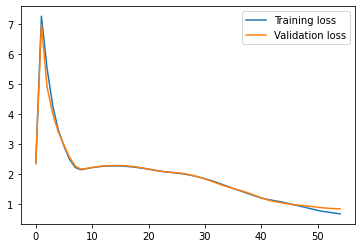

In [ ]:
# plotting the training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
# prediction for training set
with torch.no_grad():
    output = model(train_x)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.80623973727422

In [ ]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.6593406593406593

In [ ]:
# predicting on test set

In [ ]:
# loading testing images
apply_transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor()])
test_data_img = []
for index in tqdm.trange(len(df_test['digit'])):
    # defining the image path
    img_path = '/content/BDRW_dataset/' + str(df_test['digit'][index]) + '.jpg'
    # reading the image
    img = Image.open(img_path).convert('L')
    #transforming
    img_transformed = apply_transform(img)
    #converting back to numpy
    img_numpy = img_transformed.numpy()
    test_data_img.append(img_numpy)

# converting the list to numpy array
test_x = np.array(test_data_img)
# defining the target
test_y = df_test['label'].values
test_x.shape

100%|██████████| 693/693 [00:00<00:00, 2376.88it/s]


(693, 1, 28, 28)

In [ ]:
test_x = test_x.reshape(693, 1, 28, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([693, 1, 28, 28])

In [ ]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predict = np.argmax(prob, axis=1)

In [ ]:
# replacing the label with prediction
test_results = pd.DataFrame(columns = ["label"])
test_results['label'] = predict

In [ ]:
test_y = df_test['label'].values

In [ ]:
type(train_y)

torch.Tensor

In [ ]:
test_y = test_y.astype(int);
test_y = torch.from_numpy(test_y)

In [ ]:
# accuracy on test set
accuracy_score(test_y, predict)

0.6911976911976911